<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Александр, доброго дня! рад приветствовать тебя! <br />
(а дальше шаболннная обящательная часть, как ты заметил по другим спринтам)
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

### Инструкция по выполнению проекта

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

### Описание данных

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

# 1. Подготовка

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
import transformers
import matplotlib.pyplot as plt
%matplotlib inline

import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/datasets/toxic_comments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [4]:

df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
данные на базе, ОК)

# 2. Обучение

### Bag of Words

Формирование признаков техникой "мешок слов".   

Вначале попробуем просчитать модели с различными параметрами "мешка слов".  
Полученные таким образом признаки с лучшим значением метрики f1_score применим для улучшения этой метрики с помощью изменения гиперпараметров модели логистической регрессии.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
план понятен.

In [5]:
scores = []

train, test, target_train, target_test = train_test_split(df['text'], df['toxic'], test_size=0.25)

def model_train(params_for_features, params_for_model):
    
    count_vectorizer = CountVectorizer(stop_words='english', analyzer='word', 
                                       token_pattern=r'[a-zA-Z]{2,}', **params_for_features)
    cv_train = count_vectorizer.fit_transform(train)
    cv_test = count_vectorizer.transform(test)

    model = LogisticRegression(random_state=123, **params_for_model)
    model.fit(cv_train, target_train)

    f1_score_train = f1_score(target_train, model.predict(cv_train))
    f1_score_test = f1_score(target_test, model.predict(cv_test))

    name = 'maxdf{max_df}+mindf{min_df}+C{C}+{solver}'.format(**params_for_features, **params_for_model)
    scores.append([name, f1_score_train, f1_score_test])


In [6]:
%%time
# создание мешка слов со стандартными параметрами max_df и min_df
scores = []
params_for_features = {
    'max_df': 1., 
    'min_df': 1, 
}
model_train(params_for_features, {'C': 1, 'solver':'liblinear'})
model_train(params_for_features, {'C': 1, 'solver':'lbfgs'})
model_train(params_for_features, {'C': 1, 'solver':'sag'})

pd.DataFrame(scores, columns=['params', 'f1_train', 'f1_test'])

CPU times: user 1min 41s, sys: 52 s, total: 2min 33s
Wall time: 2min 34s


,params,f1_train,f1_test
0,maxdf1.0+mindf1+C1+liblinear,0.717057,0.673514
1,maxdf1.0+mindf1+C1+lbfgs,0.887356,0.753366
2,maxdf1.0+mindf1+C1+sag,0.366927,0.360258


Максимальные значения метрики получаются при расчете моделей логистической регрессии с параметром solver='lbfgs'.
Далее будем использовать этот параметр именно с этим значением при работе с логистической регрессией.

In [7]:
%%time

scores = []
# модели с созданием мешка слов с другими max_df и min_df
for max_df in 0.85, 0.9, 0.95, 1.:
    for min_df in 1, 2, 5, 10:
        params_for_features = {
            'max_df': max_df, 
            'min_df': min_df, 
        }
        model_train(params_for_features, {'C': 1, 'solver':'lbfgs'})

CPU times: user 8min 7s, sys: 5min 46s, total: 13min 53s
Wall time: 14min 6s


In [8]:
df_scores = pd.DataFrame(scores, columns=['params', 'f1_train', 'f1_test'])
df_scores_max = df_scores[df_scores['f1_test'] == df_scores['f1_test'].max()].reset_index()
df_scores_max

,index,params,f1_train,f1_test
0,2,maxdf0.85+mindf5+C1+lbfgs,0.861364,0.754107
1,6,maxdf0.9+mindf5+C1+lbfgs,0.861364,0.754107
2,10,maxdf0.95+mindf5+C1+lbfgs,0.861364,0.754107
3,14,maxdf1.0+mindf5+C1+lbfgs,0.861364,0.754107


Таким образом, обнаружили, что создание мешка слов со стандартными параметрами max_df и min_df показывает максимальное значение метрики f1_score на модели логистической регрессии с solver='lbfgs'.

In [10]:
best_param = {
    'max_df': 1., 
    'min_df': 1, 
}
print('best_param:', best_param)

best_param: {'max_df': 1.0, 'min_df': 1}


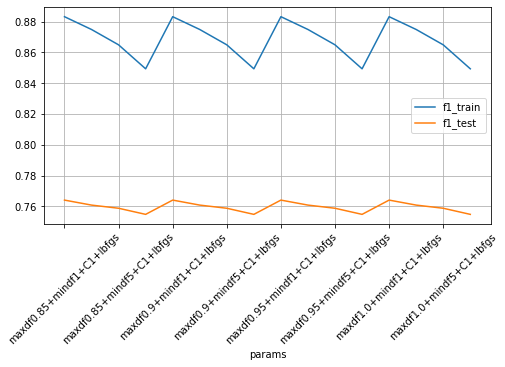

In [12]:
df_scores.plot.line(x='params', grid=True, figsize=(8, 4), rot=45);

In [13]:
%%time
# расчет логистической регрессии с различными значениями гиперпараметра С
scores = []
for c in 0.5, 1, 5, 10:
    model_train(best_param, {'C': c, 'solver':'lbfgs'})

Wall time: 52.6 s


In [14]:
df_scores2 = pd.DataFrame(scores, columns=['params', 'f1_train', 'f1_test'])
df_scores2['best'] = df_scores2.loc[1, 'f1_test']
df_scores2.sort_values('f1_test', ascending=False).head()

,params,f1_train,f1_test,best
3,maxdf1.0+mindf1+C10+lbfgs,0.944719,0.773575,0.764081
2,maxdf1.0+mindf1+C5+lbfgs,0.927830,0.767915,0.764081
1,maxdf1.0+mindf1+C1+lbfgs,0.883270,0.764081,0.764081
0,maxdf1.0+mindf1+C0.5+lbfgs,0.853392,0.750825,0.764081


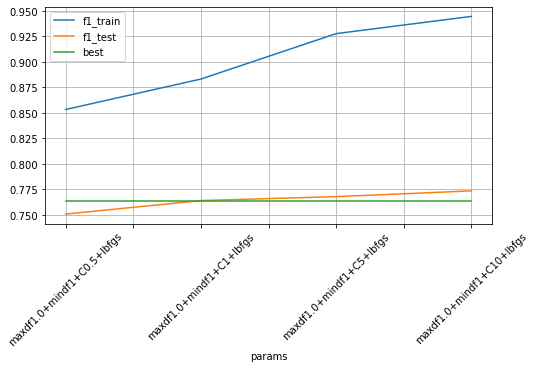

In [15]:
df_scores2.plot.line(x='params', grid=True, figsize=(8, 4), rot=45);

Изменение гиперпараметра С в модели логистической регрессии слабо повлияла на улучшение качества модели.  

**Итак, лучшие показатели метрики f1_score=0.765543 было получено при формировании признаков техникой "мешок слов" с параметрами 'max_df': 1., 'min_df': 1 и гиперпараметром С=5 модели логистической регрессии.**
***

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
отлично, добавить не чего)

### TF-IDF

In [17]:
def tf_model_train(params_for_features, params_for_model):
    tf = TfidfVectorizer(stop_words='english', analyzer='word', 
                         token_pattern=r'[a-zA-Z]{2,}', **params_for_features)

    tf_train = tf.fit_transform(train)
    tf_test = tf.transform(test)
            
    model = LogisticRegression(random_state=123, solver='lbfgs', **params_for_model)

    model.fit(tf_train, target_train)
    f1_score_train = f1_score(target_train, model.predict(tf_train))
    f1_score_test = f1_score(target_test, model.predict(tf_test))

    name = 'maxdf{max_df}+mindf{min_df}+C{C}'.format(**params_for_features, **params_for_model)
    scores.append([name, f1_score_train, f1_score_test])


In [18]:
%%time

# создание признаков со стандартными параметрами max_df и min_df
scores = []
params_for_features = {
    'max_df': 1., 
    'min_df': 1, 
}
tf_model_train(params_for_features, {'C': 1})

pd.DataFrame(scores, columns=['params', 'f1_train', 'f1_test'])

Wall time: 12.8 s


,params,f1_train,f1_test
0,maxdf1.0+mindf1+C1,0.755544,0.730425


In [19]:
%%time

scores = []
# создание признаков с другими параметрами max_df и min_df

for max_df in 0.85, 0.90, 0.95, 1.:
    for min_df in 1, 2, 5, 10:
        params_for_features = {
            'max_df': max_df, 
            'min_df': min_df, 
        }
        tf_model_train(params_for_features, {'C': 1})

Wall time: 2min 55s


In [20]:
df_tf_scores = pd.DataFrame(scores, columns=['params', 'f1_train', 'f1_test'])
df_tf_scores_max = df_tf_scores[df_tf_scores['f1_test'] == df_tf_scores['f1_test'].max()].reset_index()
df_tf_scores_max

,index,params,f1_train,f1_test
0,3,maxdf0.85+mindf10+C1,0.764412,0.73781
1,7,maxdf0.9+mindf10+C1,0.764412,0.73781
2,11,maxdf0.95+mindf10+C1,0.764412,0.73781
3,15,maxdf1.0+mindf10+C1,0.764412,0.73781


In [21]:
substr_tf = lambda y: df_tf_scores_max.loc[0, 'params'].split(y)[1].split('+')[0]
                    
tf_best_param = {
    'max_df': float(substr_tf('maxdf')), 
    'min_df': int(substr_tf('mindf')), 
}
print('tf_best_param:', tf_best_param)

tf_best_param: {'max_df': 0.85, 'min_df': 10}


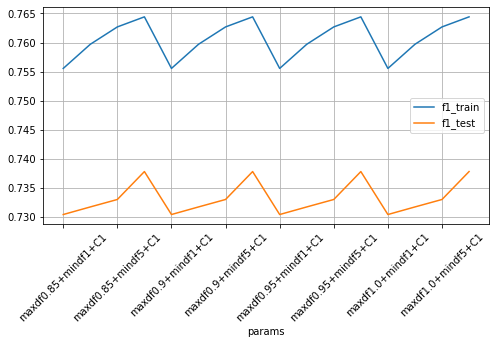

In [22]:
df_tf_scores.plot.line(x='params', grid=True, figsize=(8, 4), rot=45);

### RandomForestClassifier

In [24]:
train, test, target_train, target_test = train_test_split(df['text'], df['toxic'], test_size=0.25)

count_vectorizer = CountVectorizer(stop_words='english', analyzer='word', token_pattern=r'[a-zA-Z]{2,}')

cv_train = count_vectorizer.fit_transform(train)
cv_test = count_vectorizer.transform(test)

In [25]:
%%time
# Расчет модели при стандартных параметрах

model = RandomForestClassifier(random_state=123)
model.fit(cv_train, target_train)

f1_score_train = f1_score(target_train, model.predict(cv_train))
f1_score_test = f1_score(target_test, model.predict(cv_test))
f1_score_train, f1_score_test

Wall time: 11min 18s


(0.9987226502946145, 0.7251123025648456)

При стандартных параметрах модель Случайного леса показал худшее качество, чем на модели логистической регрессии.

Можно конечно улучшить картину играя с гиперпарами модели , но лучше этого не делать(отнимает тучу времени и ресурсов)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
И это здорово!

### GradientBoostingClassifier

In [26]:
%%time
# Расчет модели при стандартных параметрах

model = GradientBoostingClassifier(random_state=123)

model.fit(cv_train, target_train)

f1_score_train = f1_score(target_train, model.predict(cv_train))
f1_score_test = f1_score(target_test, model.predict(cv_test))
f1_score_train, f1_score_test

Wall time: 1min 7s


(0.5690785689635339, 0.5465559016960886)

Таже самая история , игрался заняло море времени,но выводы ниже. 

При стандарных параметрах расчета значение метрики f1_score очень далеко от нужного нам порога в 0,75.  
Но стоило поменять 2 параметра: max_depth=100 и min_samples_leaf=3 - как модель сразу же достигла требуемого порога (0.752286). Но время вычислений выросло во много раз и превысило 1 час.  
При некотором запасе ресурсов вариацией гиперпараметров можно было бы достичь гораздо более высокого значения метрики.
***

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
да ты аналитический маньяк:) ничего не упускаешь.

### CatBoostClassifier

In [28]:
%%time
# Расчет модели при стандартных параметрах

model = CatBoostClassifier(random_seed=123, thread_count=-1)

model.fit(cv_train, target_train)

f1_score_train = f1_score(target_train, model.predict(cv_train))
f1_score_test = f1_score(target_test, model.predict(cv_test))
'f1_score_train: {}'.format(f1_score_train), 'f1_score_test: {}'.format(f1_score_test)

Learning rate set to 0.064894
0:	learn: 0.6236166	total: 712ms	remaining: 11m 51s
1:	learn: 0.5681177	total: 1.31s	remaining: 10m 55s
2:	learn: 0.5184401	total: 1.96s	remaining: 10m 52s
3:	learn: 0.4776953	total: 2.57s	remaining: 10m 40s
4:	learn: 0.4435455	total: 3.17s	remaining: 10m 31s
5:	learn: 0.4139313	total: 3.83s	remaining: 10m 34s
6:	learn: 0.3898397	total: 4.39s	remaining: 10m 22s
7:	learn: 0.3683523	total: 4.93s	remaining: 10m 11s
8:	learn: 0.3495136	total: 5.51s	remaining: 10m 6s
9:	learn: 0.3337827	total: 6.07s	remaining: 10m
10:	learn: 0.3202720	total: 6.62s	remaining: 9m 54s
11:	learn: 0.3086364	total: 7.16s	remaining: 9m 49s
12:	learn: 0.2987593	total: 7.71s	remaining: 9m 45s
13:	learn: 0.2902846	total: 8.25s	remaining: 9m 41s
14:	learn: 0.2818167	total: 8.83s	remaining: 9m 39s
15:	learn: 0.2752903	total: 9.38s	remaining: 9m 36s
16:	learn: 0.2684587	total: 9.93s	remaining: 9m 34s
17:	learn: 0.2634658	total: 10.5s	remaining: 9m 35s
18:	learn: 0.2591908	total: 11.1s	remai

('f1_score_train: 0.7499258966505286', 'f1_score_test: 0.7048129935926092')

In [29]:
%%time
# Расчет модели при стандартных параметрах

model = CatBoostClassifier(random_seed=123, thread_count=-1, iterations=500, verbose=False, learning_rate=1)

model.fit(cv_train, target_train)

f1_score_train = f1_score(target_train, model.predict(cv_train))
f1_score_test = f1_score(target_test, model.predict(cv_test))
'f1_score_train: {}'.format(f1_score_train), 'f1_score_test: {}'.format(f1_score_test)

Wall time: 5min 10s


('f1_score_train: 0.8699291980228882', 'f1_score_test: 0.7399723374827111')

# 3. Выводы

Первое, что хотелось бы отметить - признаки, полученные техникой "мешок слов" (в отличие техники TF_IDF), уже на стандартных параметрах модели логистической регрессии дают значение метрики f1 выше требуемого порога в 0,75.

"Мешок слов" был проверен и на других моделях классификации - RandomForestClassifier, GradientBoostingClassifier и CatBoostClassifier - и почти на всех этих видах моделей были подобраны параметры, при котором значение f1 превысило необходимый порог.  
Но при этом некоторые модели затрачивали очень большое время на расчеты. 

---

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Александр, задачка такая, что часто и железо не тянет, больше на терпение))<br>
Интересные исследования по применению разных моделей ты провёл!<br>
Это одна из интереснейших работ на этом спринте, что мне довелось проверять!<br>
Однозначно видно, что ты понимаешь что делать.<br>
И если потребуется на практике - реально сможешь применить. А это тот результат, что и нужен на обучении.<br>
Если же говорить о потенциале по точности модели, то тут он, в том числе, кроется в исследовании самих фраз: длинные/короткие (возможно даже как фактор внести размер фразы - ну или поисследовать этот момент), установить минимальное количество букв во фразе... <br>
    
    
Спасибо) УСПЕШНОГО И ДАЛЬШЕ ОБУЧЕНИЯ!

# 3. Выводы

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны